# TAREA 3

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Cargamos la base de datos preprocesada

In [2]:
from google.colab import files
uploaded=files.upload()

Saving BaseDatos_Mod.csv to BaseDatos_Mod.csv


In [3]:
df= pd.read_csv("BaseDatos_Mod.csv")   #he cambiado el nombre del csv, tengo que cambiarlo de vuelta (GEMA)
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot',
       'TP', 'ALB', 'AG', 'Class'],
      dtype='object')

Definimos las variables

In [0]:
#variable independiente -> explicativas 
x = df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot', 'TP','ALB','Class']].values
variables_aux=df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot', 'TP','ALB','Class']]
#variable dependiente -> variable respuesta
y = df[['AG']].values

Dividimos las variables en los subconjuntos test y train

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

Normalizamos

In [0]:
escalar=StandardScaler()
X_train_normalizado= escalar.fit_transform(X_train)
X_test_normalizado= escalar.transform(X_test)

### Modelo de regresión 

In [33]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model = model.fit(X_train_normalizado, y_train)
y_pred = model.predict(X_test_normalizado)
reg_error=mean_squared_error(y_test, y_pred)
reg_r2= r2_score(y_test, y_pred)
#Interpretar 
for idx, col_name in enumerate(variables_aux.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)#Buscar en los apuntes
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))#coeficiente de correlacion

The coefficient for Age is -0.013225543208682205
The coefficient for Gender is 0.007118639332012955
The coefficient for TB is 0.0182120287358293
The coefficient for DB is -0.01371837223325555
The coefficient for Alkphos is -0.026784604634708945
The coefficient for Sgpt is -0.005386427217785129
The coefficient for Sgot is -0.002134234447439336
The coefficient for TP is -0.19639950824906696
The coefficient for ALB is 0.3576749826106423
The coefficient for Class is -0.011910274306912355
Independent term: 
 [0.94198226]
Mean squared error: 0.01
Variance score: 0.84


In [0]:
from sklearn.model_selection import cross_val_score
reg_error_val=cross_val_score(model, X_train_normalizado, y_train, cv=3, scoring='neg_mean_squared_error').mean()
reg_r2_val=cross_val_score(model, X_train_normalizado, y_train, cv=3, scoring='r2').mean()

Cambiamos en número de variables explicativas: eliminamos ALB y TP (son las que mas relacione lineal tienen con la variable dependiente)

In [0]:
#variable independiente -> explicativas 
x = df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot','Class']].values
variables_aux=df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot','Class']]
#variable dependiente -> variable respuesta
y = df[['AG']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

X_train_normalizado= escalar.fit_transform(X_train)
X_test_normalizado= escalar.transform(X_test)

In [36]:
model = linear_model.LinearRegression()
model = model.fit(X_train_normalizado, y_train)
y_pred = model.predict(X_test_normalizado)

#Interpretar 
for idx, col_name in enumerate(variables_aux.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)#Buscar en los apuntes
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))#coeficiente de determinación

The coefficient for Age is -0.05052153085271341
The coefficient for Gender is -0.0012106258432789258
The coefficient for TB is 0.008763245564515715
The coefficient for DB is -0.053100749515295906
The coefficient for Alkphos is -0.060938630935454985
The coefficient for Sgpt is 0.017568540713960096
The coefficient for Sgot is -0.024198301392156032
The coefficient for Class is 0.01955102901030529
Independent term: 
 [0.94198226]
Mean squared error: 0.07
Variance score: 0.17


Cambiamos en número de variables explicativas, eliminamos las que menos correlacióón lineal tienen con la salida: 

*   
*   



In [0]:
#variable independiente -> explicativas 
x = df[['Age', 'DB', 'Alkphos', 'TP','ALB']].values
variables_aux=df[['Age', 'DB', 'Alkphos', 'TP','ALB']]
#variable dependiente -> variable respuesta
y = df[['AG']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

X_train_normalizado= escalar.fit_transform(X_train)
#X_test_normalizado= escalar.transform(X_test)

In [12]:
model = linear_model.LinearRegression()
model = model.fit(X_train_normalizado, y_train)
y_pred = model.predict(X_test)

#Interpretar 
for idx, col_name in enumerate(variables_aux.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)#Buscar en los apuntes
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))#coeficiente de correlacion

The coefficient for Age is -0.011566785198619523
The coefficient for DB is 0.005255636628029803
The coefficient for Alkphos is -0.026481066966478773
The coefficient for TP is -0.19424157574304132
The coefficient for ALB is 0.3547118955603662
Independent term: 
 [0.94198226]
Mean squared error: 57.77
Variance score: -649.36


### K-nearest neighbors


In [0]:
#variable independiente -> explicativas 
x = df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot', 'TP','ALB','Class']].values
variables_aux=df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot', 'TP','ALB','Class']]
#variable dependiente -> variable respuesta
y = df[['AG']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

X_train_normalizado= escalar.fit_transform(X_train)
#X_test_normalizado= escalar.transform(X_test)

Diseñamos el modelo

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

k_values=list(range(1,31,2))
k_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_normalizado, y_train, cv=3, scoring= metrics.make_scorer(metrics.mean_squared_error))
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated mean_squared_error')

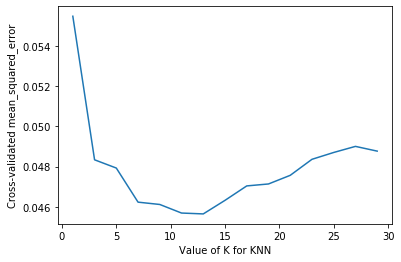

In [15]:
plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated mean_squared_error')

In [16]:
best_K_value=k_values[k_scores.index(min(k_scores))]
print('valor de k =',best_K_value)
print('score con k=',best_K_value,':', min(k_scores))

valor de k = 13
score con k= 13 : 0.04564662876421654


Entrenamos al modelo

In [17]:
model = KNeighborsRegressor(n_neighbors=best_K_value)
model = model.fit(X_train_normalizado, y_train)
y_pred = model.predict(X_train_normalizado)
knn_error=mean_squared_error(y_train, y_pred)
knn_r2=r2_score(y_train, y_pred)

print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))#coeficiente de correlacion

Mean squared error: 0.04
Variance score: 0.53


##### Curvas de aprendizaje

15 15 15


Text(0, 0.5, 'Mean squared error')

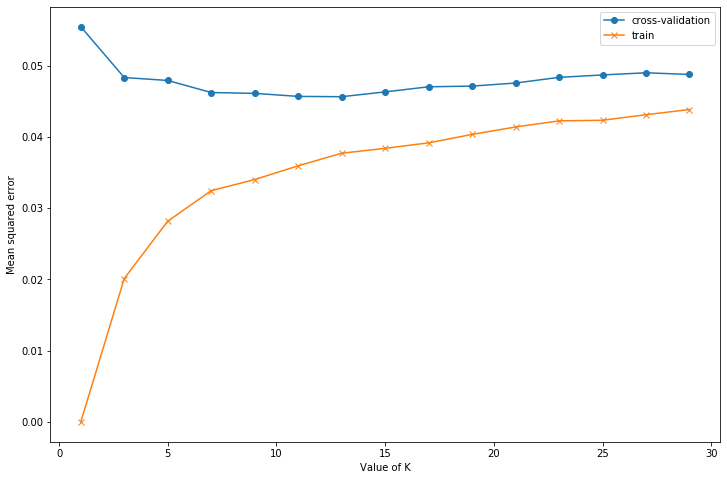

In [18]:
scores_train=[]
k_scores = []


for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normalizado, y_train) 
    y_pred = knn.predict(X_train_normalizado)
    scores_train.append(metrics.mean_squared_error(y_train, y_pred))
    #scores_train.append(knn.score(X_train_normalizado,y_train))
    scores = cross_val_score(knn, X_train_normalizado, y_train, cv=3, scoring= metrics.make_scorer(metrics.mean_squared_error))
    k_scores.append(scores.mean())
print(len(scores_train),len(k_scores),len(k_values))
plt.figure(figsize=(12,8))
plt.plot(k_values, k_scores, marker='o', label='cross-validation')
plt.plot(k_values, scores_train, marker='x', label='train')
plt.legend(loc='upper right')
plt.xlabel('Value of K')
plt.ylabel('Mean squared error')

In [0]:
knn_error_val=cross_val_score(model, X_train_normalizado, y_train, cv=3, scoring='neg_mean_squared_error').mean()
knn_r2_val=cross_val_score(model, X_train_normalizado, y_train, cv=3, scoring='r2').mean()

### Árbol de regresión

Diseñamos el modelo

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

cv = 5 # Numero deseado de "folds" que haremos
k_scores = []
depth_range = range(1, 30)

for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth = depth,)
    scores = cross_val_score(tree, X_train, y_train, cv=3, scoring=metrics.make_scorer(metrics.mean_squared_error))
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated mean_squared_error')

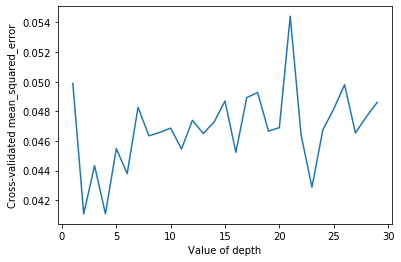

In [21]:
plt.plot(depth_range, k_scores)
plt.xlabel('Value of depth')
plt.ylabel('Cross-validated mean_squared_error')

In [22]:
best_depth_value=depth_range[k_scores.index(min(k_scores))]
print('Valor de Depth:',best_depth_value)
print('score con depth=',best_depth_value,':', min(k_scores))

Valor de Depth: 2
score con depth= 2 : 0.04107505247293169


Entrenamos al modelo

In [23]:
model = DecisionTreeRegressor(max_depth=best_depth_value)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_train)
tree_error=mean_squared_error(y_train, y_pred)
tree_r2=r2_score(y_train, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Mean squared error: 0.04
Variance score: 0.55


#### Visualización

[Text(167.4, 181.2, 'X[8] <= 3.35\nmse = 0.08\nsamples = 408\nvalue = 0.942'),
 Text(83.7, 108.72, 'X[8] <= 2.35\nmse = 0.047\nsamples = 248\nvalue = 0.799'),
 Text(41.85, 36.23999999999998, 'mse = 0.052\nsamples = 67\nvalue = 0.621'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.029\nsamples = 181\nvalue = 0.864'),
 Text(251.10000000000002, 108.72, 'X[8] <= 4.25\nmse = 0.05\nsamples = 160\nvalue = 1.164'),
 Text(209.25, 36.23999999999998, 'mse = 0.034\nsamples = 130\nvalue = 1.112'),
 Text(292.95, 36.23999999999998, 'mse = 0.052\nsamples = 30\nvalue = 1.391')]

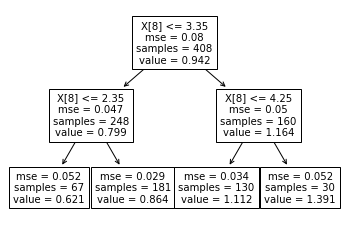

In [24]:
from sklearn import tree
tree.plot_tree(model)

##### Curvas de aprendizaje

29 29 29


Text(0, 0.5, 'mean_squared_error')

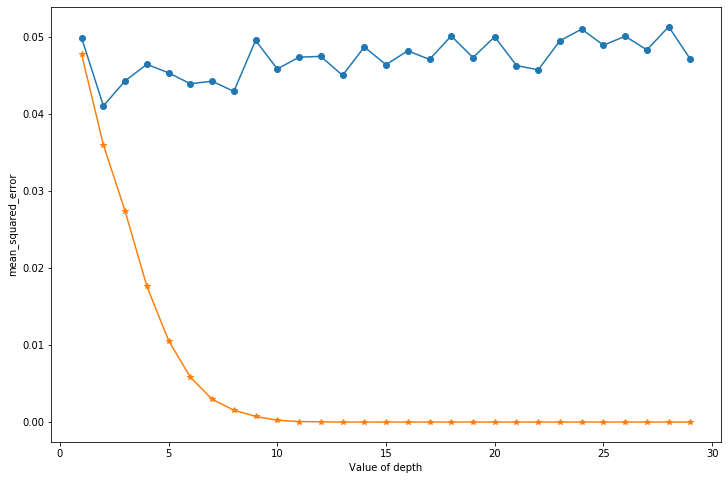

In [25]:
#Curvas de aprendizaje

scores_train=[]
k_scores = []
depth_range = range(1, 30)

for depth in depth_range:
    tree_model = DecisionTreeRegressor(max_depth = depth)
    scores = cross_val_score(tree_model, X_train, y_train, cv=3, scoring=metrics.make_scorer(metrics.mean_squared_error))
    tree_model.fit(X_train,y_train)
    y_pred = tree_model.predict(X_train)
    #scores_train.append(tree.score(X_train,y_train))
    scores_train.append(metrics.mean_squared_error(y_train, y_pred))
    k_scores.append(scores.mean())

print(len(scores_train),len(k_scores),len(depth_range))
plt.figure(figsize=(12,8))
plt.plot(depth_range , k_scores, marker='o', label='cross-validation')
plt.plot(depth_range , scores_train, marker='*', label='train')
plt.xlabel('Value of depth')
plt.ylabel('mean_squared_error')

In [0]:
tree_error_val=cross_val_score(model, X_train_normalizado, y_train, cv=3, scoring='neg_mean_squared_error').mean()
tree_r2_val=cross_val_score(model, X_train_normalizado, y_train, cv=3, scoring='r2').mean()

### Comparación de resultados

In [27]:
print('               ','|', 'Mean squared error','   |','d','    |')
print('----------------|-----------------------|--------------------|')
print('Regression     ','|', reg_error,' |',reg_r2,'|')
print('----------------|-----------------------|--------------------|')
print('K-NN           ','|',knn_error,'  |',knn_r2,'|')
print('----------------|-----------------------|--------------------|')
print('Regression Tree','|', tree_error,'  |',tree_r2,'|')
print('----------------|-----------------------|--------------------|')

                | Mean squared error    | d     |
----------------|-----------------------|--------------------|
Regression      | 66.46965777203202  | -747.2502332673776 |
----------------|-----------------------|--------------------|
K-NN            | 0.03771532277822593   | 0.5264653523043452 |
----------------|-----------------------|--------------------|
Regression Tree | 0.036005127832347786   | 0.5479377009820778 |
----------------|-----------------------|--------------------|


El mejor modelo es: **Regresión lineal**, porque su error es el mas bajo y el coeficiente de determinación es el más alto

In [0]:
from tabulate import tabulate

In [37]:
#validacion
resultados = [['Validación', 'Regression','K-NN','Regression Tree'],
         ['Mean squared error', (-1)*reg_error_val, (-1)*knn_error_val, (-1)*tree_error_val],
         ['Determined coeficient', reg_r2_val, knn_r2_val, tree_r2_val]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════╤══════════════╤═══════════╤═══════════════════╕
│ Validación            │   Regression │      K-NN │   Regression Tree │
╞═══════════════════════╪══════════════╪═══════════╪═══════════════════╡
│ Mean squared error    │    0.0191394 │ 0.0456466 │         0.0410751 │
├───────────────────────┼──────────────┼───────────┼───────────────────┤
│ Determined coeficient │    0.760265  │ 0.425685  │         0.48363   │
╘═══════════════════════╧══════════════╧═══════════╧═══════════════════╛


In [38]:
#test
resultados = [['Test', 'Regression','K-NN','Regression Tree'],
         ['Mean squared error', reg_error, knn_error, tree_error],
         ['Determined coeficient', reg_r2, knn_r2, tree_r2]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════╤══════════════╤═══════════╤═══════════════════╕
│ Test                  │   Regression │      K-NN │   Regression Tree │
╞═══════════════════════╪══════════════╪═══════════╪═══════════════════╡
│ Mean squared error    │    0.0138942 │ 0.0377153 │         0.0360051 │
├───────────────────────┼──────────────┼───────────┼───────────────────┤
│ Determined coeficient │    0.843593  │ 0.526465  │         0.547938  │
╘═══════════════════════╧══════════════╧═══════════╧═══════════════════╛
